In [1]:
#https://www.youtube.com/watch?v=Y7XBsFzByTQ

import sys
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

#https://towardsdatascience.com/the-simplest-way-of-making-gifs-and-math-videos-with-python-aec41da74c6e
#import celluloid
from celluloid import Camera # getting the camera
from IPython.display import HTML # to show the animation in Jupyter

#creates a figure with 10 (width) x 5 (height) inches
plt.rcParams['figure.figsize'] = [5, 5]
np.set_printoptions(threshold=sys.maxsize)


In [2]:
def gif_test():
    fig, ax = plt.subplots() # creating my fig
    
    camera = Camera(fig)# the camera gets the fig we'll plot
    
    for i in range(10):
        ax.plot([i] * 5, c='black') # 5 element array from 0 to 9
        camera.snap() # the camera takes a snapshot of the plot
        
    animation = camera.animate() # animation ready
    #Note: sudo apt install ffmpeg
    HTML(animation.to_html5_video()) # displaying the animation

In [3]:
def gif_test2():
    from celluloid import Camera # getting the camera
    import matplotlib.pyplot as plt
    import numpy as np
    from IPython.display import HTML
    fig, ax = plt.subplots(figsize=(10, 6)) # let's make it bigger
    camera = Camera(fig)# the camera gets our figure
    x = np.linspace(0, np.pi*2, 60) # a sine circle
    y = np.sin(x) # sine
    for i in range(len(x)):
        #x_t = x[:i] # current dataset
        x_t = x[:i] 
        y_t = y[:i] # current sine
        ax.plot(x_t, y_t, c='blue')
        camera.snap()
    animation = camera.animate()
    HTML(animation.to_html5_video())

(1500, 1043, 3)


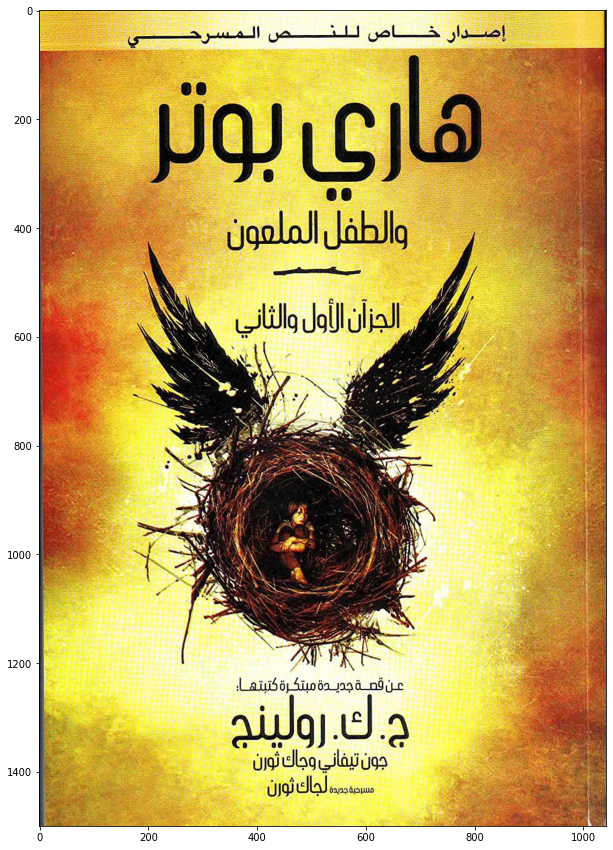

In [4]:
#https://matplotlib.org/stable/tutorials/colors/colormaps.html (for color maps)

#img_ocr_perfect = cv2.imread("/home/mostafa/Desktop/OCR/01_ocr_perfect.jpg")
#image = cv2.imread("/home/mostafa/Desktop/OCR/book_cover_arabic_realistic.jpg")
image = cv2.imread("/home/mostafa/Desktop/OCR/book_cover_perfect_hard.jpg")#Convert to gray Challenge
#image = cv2.imread("/home/mostafa/Desktop/OCR/mix_color_hard.jpg")#Binarization Challenging 
#image = cv2.imread("/home/mostafa/Desktop/OCR/xyz.jpg")

print(image.shape)

#scale_percent = 100 # percent of original size
#width = int(image.shape[1] * scale_percent / 100)
#height = int(image.shape[0] * scale_percent / 100)
#image = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
#print('Resized Dimensions : ',image.shape)

plt.rcParams['figure.figsize'] = [15, 15]
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [5]:
text = pytesseract.image_to_string(image)
print('pytesseract text ',text)

pytesseract text     

ning).
Ug log lay y99
Jail mao

 



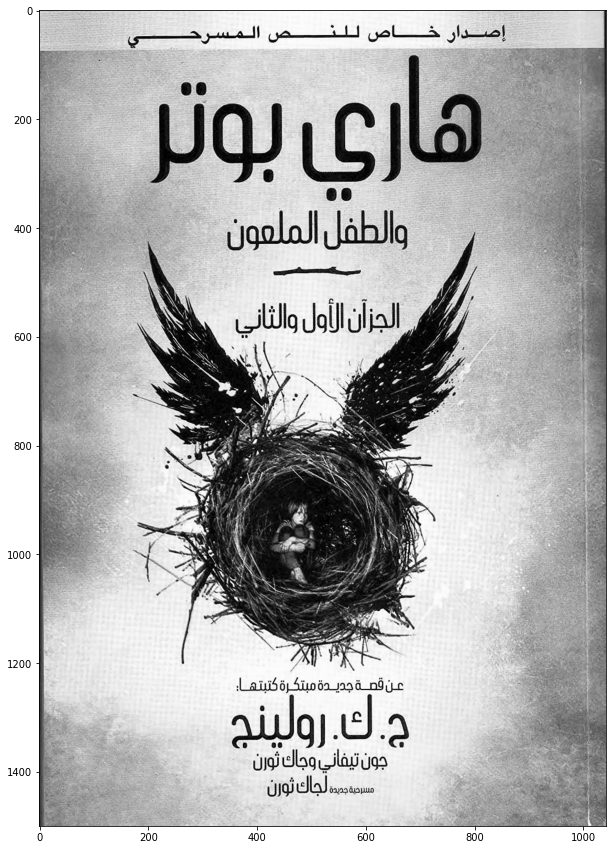

In [6]:
#https://note.nkmk.me/en/python-numpy-opencv-image-binarization/
#https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

#th3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#thresholdedImage = 255-thresholdedImage
#plt.imshow(cv2.cvtColor(thresholdedImage,cv2.COLOR_BGR2RGB))
#cv2.imwrite('/home/mostafa/Desktop/OCR/outputs/thresholded_otsu_test1.jpg', thresholdedImage)

def view_details(arr):
    # Printing type of arr object
    print("Array is of type: ", type(arr))
    # Printing array dimensions (axes)
    print("No. of dimensions: ", arr.ndim)
    # Printing shape of array
    print("Shape of array: ", arr.shape)
    # Printing size (total number of elements) of array
    print("Size of array: ", arr.size)
    # Printing type of elements in array
    print("Array stores elements of type: ", arr.dtype)
    
img = image.copy()
r=0.299+0.299
g=0.587-0.299
b=1-r-g
img = np.dot(img[... , :3] , [b , g, r])
#img3 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img=img.astype('uint8')
#img = cv2.medianBlur(img,3)
#print(img[0:100,0:100])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR))

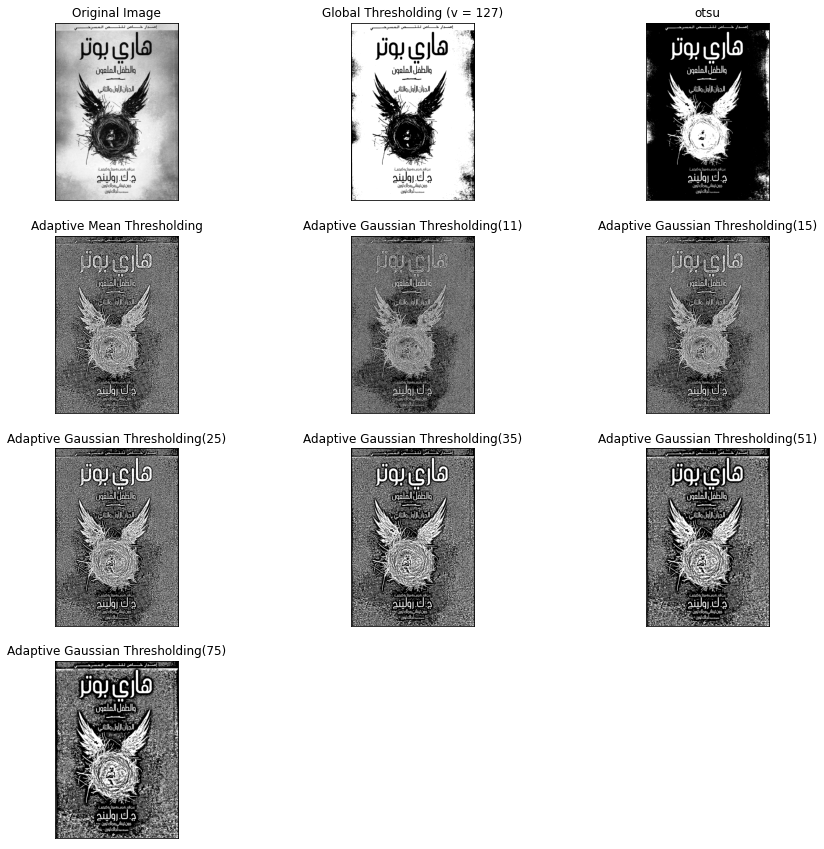

In [7]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = 255-cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = 255-cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
th4 = 255-cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)
th5 = 255-cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,25,2)
th6 = 255-cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,35,2)
th7 = 255-cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,51,2)
th8 = 255-cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,75,2)
th_otsu,im_gray_th_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
im_gray_th_otsu=255-im_gray_th_otsu

titles = ['Original Image', 'Global Thresholding (v = 127)','otsu','Adaptive Mean Thresholding',
          'Adaptive Gaussian Thresholding(11)','Adaptive Gaussian Thresholding(15)','Adaptive Gaussian Thresholding(25)',
         'Adaptive Gaussian Thresholding(35)','Adaptive Gaussian Thresholding(51)','Adaptive Gaussian Thresholding(75)']
images = [img, th1,im_gray_th_otsu ,th2, th3,th4,th5,th6,th7,th8]

for i in range(10):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])


In [8]:
#https://www.pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/

# apply connected component analysis to the thresholded image
(numLabels, labels, stats, centroids) = cv2.connectedComponentsWithStats(im_gray_th_otsu, 4 , cv2.CV_32S)

areas = stats[:, cv2.CC_STAT_AREA][1:]


needed= 81
-> 0 / 81 /area= 17593
-> 1 / 81 /area= 481
-> 2 / 81 /area= 74
-> 3 / 81 /area= 81
-> 4 / 81 /area= 659
-> 5 / 81 /area= 74
-> 6 / 81 /area= 1033
-> 7 / 81 /area= 294
-> 8 / 81 /area= 479
-> 9 / 81 /area= 837
-> 10 / 81 /area= 99
-> 11 / 81 /area= 106
-> 12 / 81 /area= 40
-> 13 / 81 /area= 10274
-> 14 / 81 /area= 98
-> 15 / 81 /area= 26
-> 16 / 81 /area= 14439
-> 17 / 81 /area= 393
-> 18 / 81 /area= 404
-> 19 / 81 /area= 7865
-> 20 / 81 /area= 8083
-> 21 / 81 /area= 2677
-> 22 / 81 /area= 5412
-> 23 / 81 /area= 26
-> 24 / 81 /area= 41
-> 25 / 81 /area= 386
-> 26 / 81 /area= 40
-> 27 / 81 /area= 96
-> 28 / 81 /area= 383
-> 29 / 81 /area= 391
-> 30 / 81 /area= 56
-> 31 / 81 /area= 41
-> 32 / 81 /area= 42
-> 33 / 81 /area= 2400
-> 34 / 81 /area= 332
-> 35 / 81 /area= 2408
-> 36 / 81 /area= 336
-> 37 / 81 /area= 26
-> 38 / 81 /area= 106
-> 39 / 81 /area= 55
-> 40 / 81 /area= 38
-> 41 / 81 /area= 38
-> 42 / 81 /area= 36
-> 43 / 81 /area= 96
-> 44 / 81 /area= 101
-> 45 / 81 /area

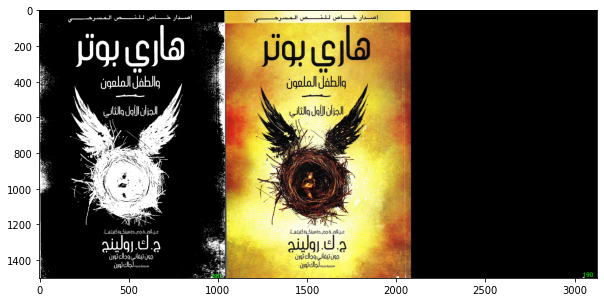

In [9]:
output = image.copy()
otsu = im_gray_th_otsu.copy()
otsu= cv2.cvtColor(otsu,cv2.COLOR_GRAY2BGR)
    
fig, ax = plt.subplots(figsize=(10, 6)); # creating my fig
camera = Camera(fig);# the camera gets the fig we'll plot

def my_condition(x):
    return x>100 and x<147000

needed = sum(map(my_condition, stats[:,cv2.CC_STAT_AREA]))

print("needed=",needed)

needed_counter=0
# loop over the number of unique connected component labels
for i in range(0, numLabels):
    if stats[i, cv2.CC_STAT_AREA]<25 or stats[i,cv2.CC_STAT_AREA]>126500:
        continue
    print("->",needed_counter,"/",needed,"/area=",stats[i, cv2.CC_STAT_AREA])
    
    #cv2.circle(output, (int(centroids[i][0]), int(centroids[i][1])), 1, (0, 255, 255), 5)

    # construct a mask for the current connected component by
    # finding a pixels in the labels array that have the current
    # connected component ID
    
    x= stats[i, cv2.CC_STAT_LEFT]
    y= stats[i, cv2.CC_STAT_TOP]
    w= stats[i, cv2.CC_STAT_WIDTH]
    h= stats[i, cv2.CC_STAT_HEIGHT]
    
    componentMask = (labels == i).astype("uint8") * 255
    componentMask = cv2.cvtColor(componentMask,cv2.COLOR_GRAY2BGR)
    cv2.putText(componentMask, str(needed_counter) , (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
    output =  cv2.cvtColor(otsu.copy(), cv2.COLOR_BGR2RGB)
    cv2.rectangle(output, (x, y),((x + w),(y + h)),(255, 255, 255), -1)
    cv2.putText(output, str(needed_counter) , (x,y+h), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    otsu_image =  cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
    cv2.rectangle(otsu_image, (x, y),((x + w),(y + h)),(255, 255, 255), -1)
    
    
    # show our output image and connected component mask
    stacked=np.hstack((output,otsu_image,componentMask))
    ax.imshow(stacked) # plotting
    camera.snap() # the camera takes a snapshot of the plot
    
    #cv2.imwrite('/home/mostafa/Desktop/OCR/outputs/componentMask_{}.jpg'.format(i), componentMask[y:y + h,x:x + w])
    cv2.imwrite('/home/mostafa/Desktop/OCR/outputs/analyzed_{}.jpg'.format(needed_counter), stacked)
    
    needed_counter=needed_counter+1
    #ax.imshow(crop_img)
    #camera.snap() # the camera takes a snapshot of the plot
#plt.imshow(output)

In [10]:
animation = camera.animate() # animation ready
print("animation done")

#Note: sudo apt install ffmpeg
HTML(animation.to_html5_video()) # displaying the animation

#plt.imshow(componentMask,cmap='gray',vmin=0,vmax=255)

animation done


(Text(0.5, 1.0, 'Original Noisy Image'), ([], []), ([], []))

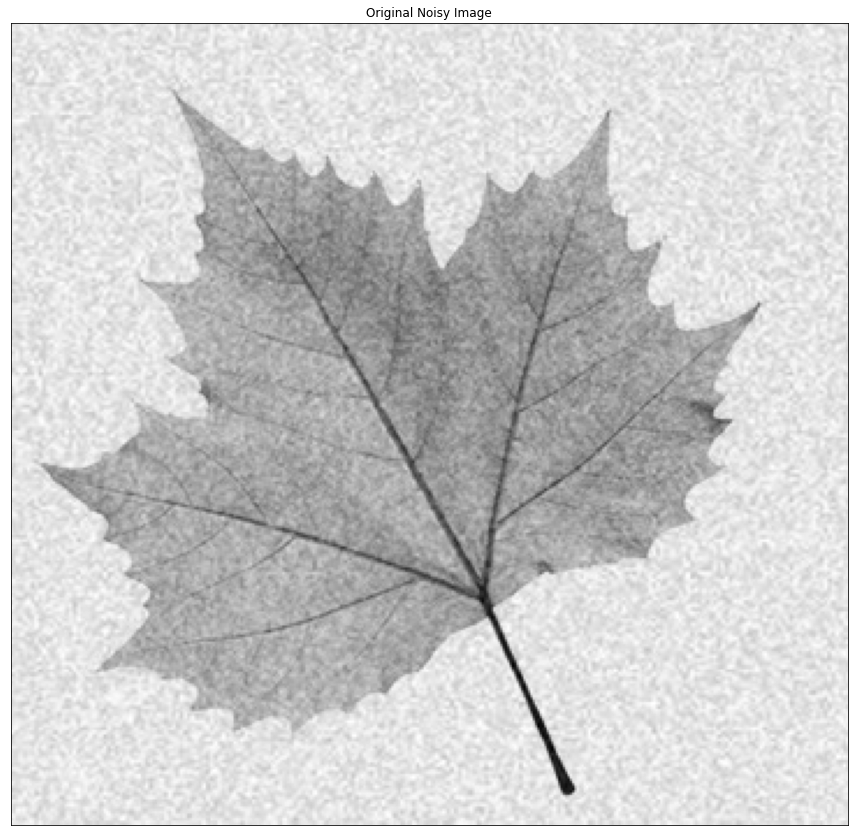

In [11]:
img = cv2.imread('/home/mostafa/Desktop/OCR/images/noisy_leaf.jpg',0)
plt.imshow(img,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])

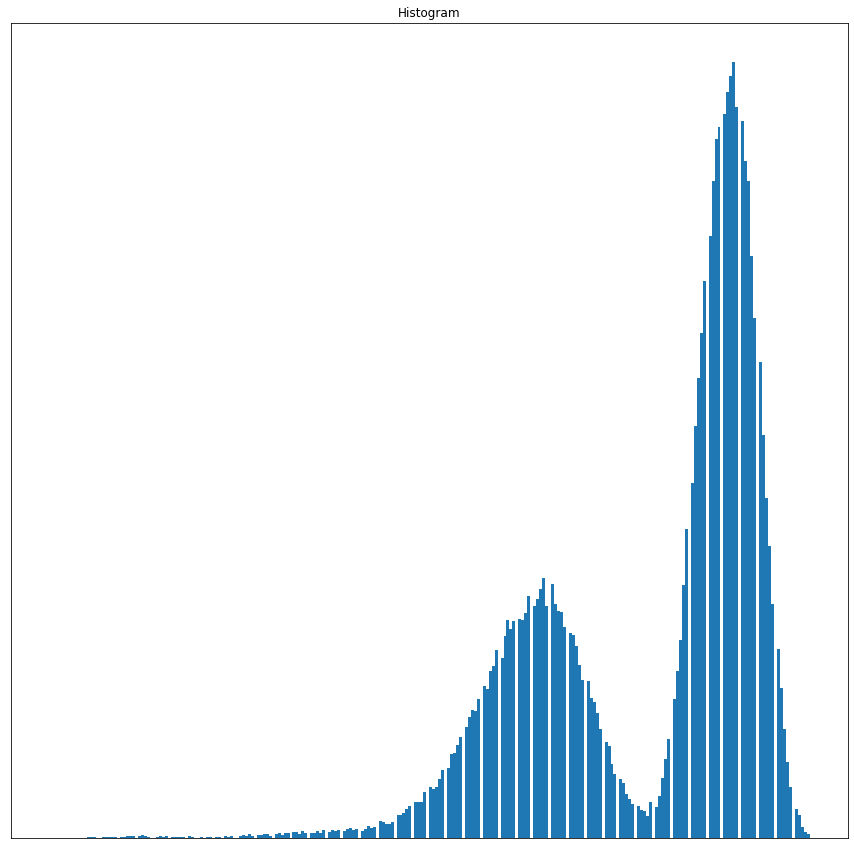

In [12]:
plt.hist(img.ravel(), 256)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Original Noisy Image'), ([], []), ([], []))

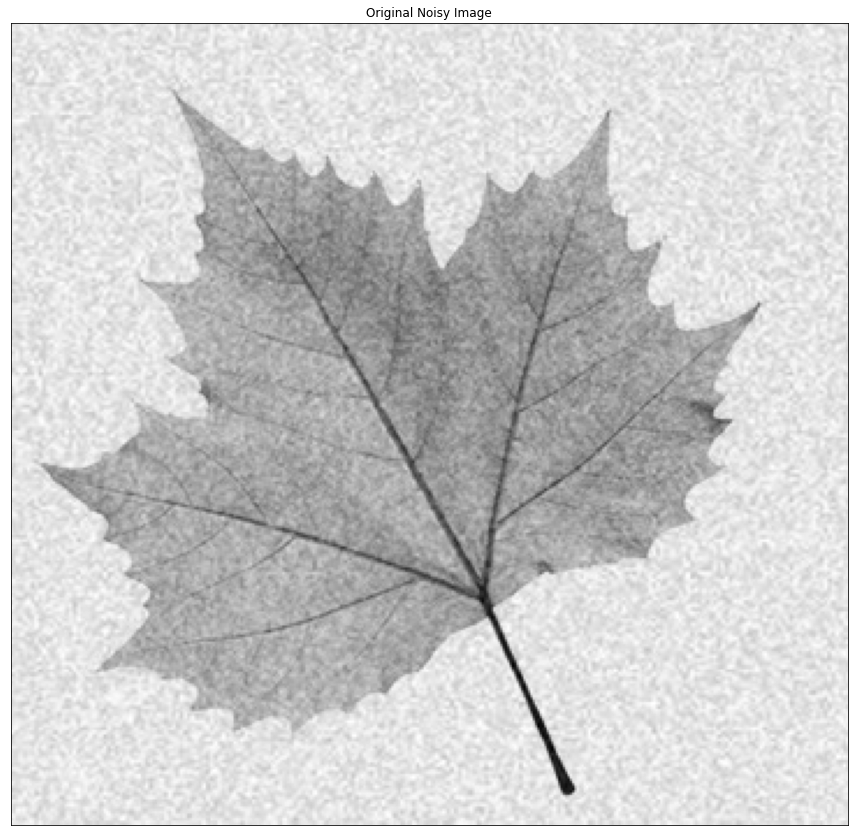

In [13]:
img = cv2.imread('/home/mostafa/Desktop/OCR/images/noisy_leaf.jpg',0)
#ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#blur = cv2.GaussianBlur(img, (5,5), 0)
#ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Histogram'), ([], []), ([], []))

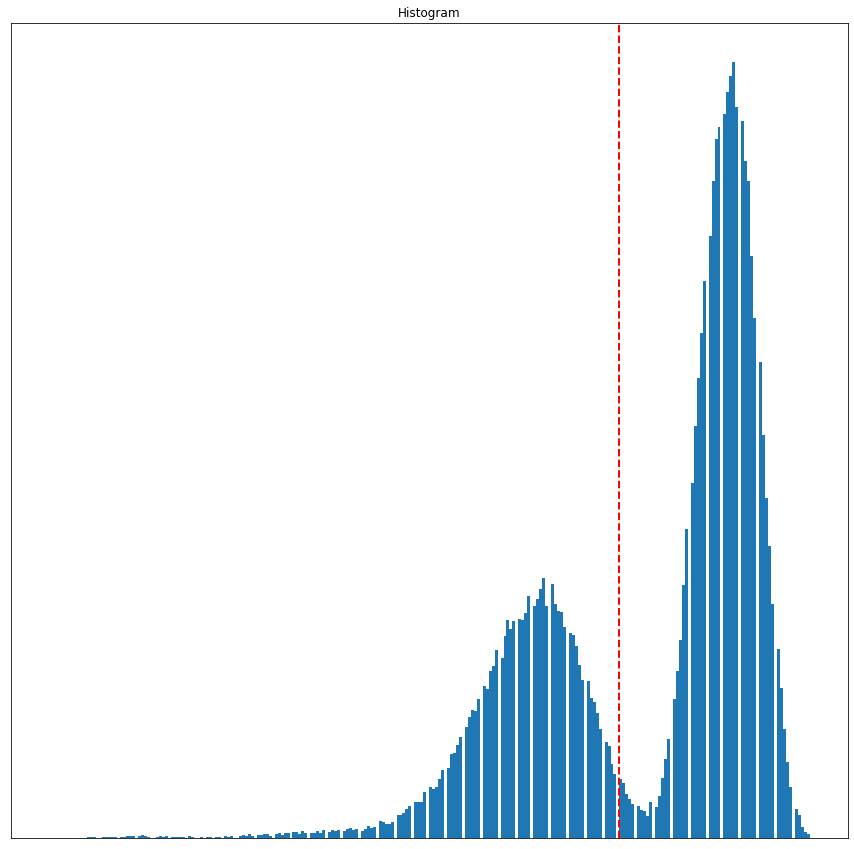

In [14]:
plt.hist(img.ravel(), 256)
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])

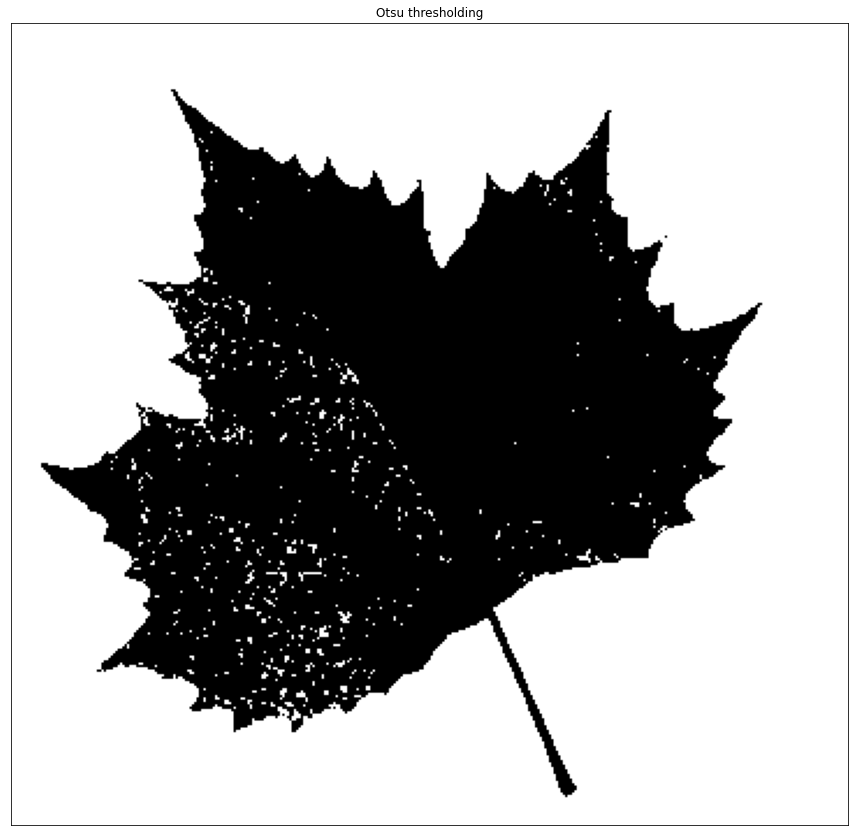

In [15]:
plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()
#https://www.meccanismocomplesso.org/en/opencv-python-the-otsus-binarization-for-thresholding/

In [16]:
imboxes=pytesseract.image_to_boxes(resized)

for boxes in imboxes.splitlines():
    boxes=boxes.split(' ')
    x,y,w,h=int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(resized,(x,height-y),(w,height-h),(0,255,0),1)
    
plt.imshow(cv2.cvtColor(resized,cv2.COLOR_BGR2RGB))

NameError: name 'resized' is not defined

In [ ]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

In [ ]:
cap=cv2.VideoCapture(-1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")

In [ ]:
cap.release()

In [ ]:
cntr=0
while False:
    ret,frame = cap.read()
    cntr=cntr+1
    if (cntr%1)==0:
        imgH,imgW,_=frame.shape
        x1,y1,w1,h1=0,0,imgH,imgW
        imgChar=pytesseract.image_to_string(frame)
        imgBoxes=pytesseract.image_to_boxes(frame)
        
        for boxes in imgBoxes.splitlines():
            boxes=boxes.split(' ')
            x,y,w,h=int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
            cv2.rectangle(frame,(x,imgH-y),(w,imgH-h),(0,0,255),1)
            
        cv2.putText(frame,imgChar, (x1+int(w1/50),y1+int(h1/50)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.imshow('Text detaction',frame)
    if cv2.waitKey(2) & 0xFF == ord('Q'):
        break
cap.release()
cv2.destroyAllWindows()